In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission_data = pd.read_csv('/content/gender_submission.csv')

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


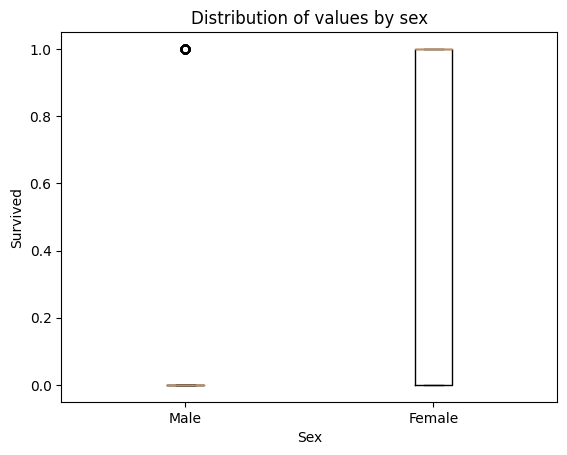

In [ ]:
plt.boxplot([train_df['Survived'][train_df['Sex'] == 'male'], train_df['Survived'][train_df['Sex'] == 'female']])
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Distribution of values by sex')
plt.show()

In [ ]:
counts = train_df.groupby('Sex')['Survived'].value_counts()
counts

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [ ]:
df = train_df[train_df['Survived'] == 1][['Sex', 'Name']]
df

,Sex,Name
1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,female,"Heikkinen, Miss. Laina"
3,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
8,female,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,female,"Nasser, Mrs. Nicholas (Adele Achem)"
...,...,...
875,female,"Najib, Miss. Adele Kiamie ""Jane"""
879,female,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)"
880,female,"Shelley, Mrs. William (Imanita Parrish Hall)"
887,female,"Graham, Miss. Margaret Edith"


In [ ]:
df_male_survivors = df[df['Sex'] == 'male']
df_female_survivors = df[df['Sex'] == 'female']

df_male_survivors

,Sex,Name
17,male,"Williams, Mr. Charles Eugene"
21,male,"Beesley, Mr. Lawrence"
23,male,"Sloper, Mr. William Thompson"
36,male,"Mamee, Mr. Hanna"
55,male,"Woolner, Mr. Hugh"
...,...,...
838,male,"Chip, Mr. Chang"
839,male,"Marechal, Mr. Pierre"
857,male,"Daly, Mr. Peter Denis"
869,male,"Johnson, Master. Harold Theodor"


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import re
def extract_title(name):
    # Use a regular expression to find the title
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If a title is found, return it; otherwise, return 'Unknown'
    if title_search:
        return title_search.group(1)
    else:
        return 'Unknown'

train_df['Title'] = train_df['Name'].apply(extract_title)
#train_df['Title'].value_counts()

In [ ]:
pclass_survivors = train_df.groupby('Pclass')['Survived'].value_counts()
pclass_survivors

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [ ]:

from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
X = train_df[['Age','Title','Pclass','Sex']]
y = train_df['Survived']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [ ]:
categorical_cols = [cname for cname in X.columns if
                    X[cname].dtype == "object"]

numerical_cols = [cname for cname in X.columns if
                X[cname].dtype in ['int64', 'float64']]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_squared_error(y_valid, preds))

MAE: 0.14252805087245946


In [ ]:
X_test = test_df[['Age', 'Title', 'Pclass', 'Sex']]
    # Extract titles from 'Name' column in test_df, similar to how you did for train_df
test_df['Title'] = test_df['Name'].apply(extract_title)

In [ ]:
test_predictions = clf.predict(X_test)

In [ ]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions.astype(int)})
submission.to_csv('submission.csv', index=False)

In [ ]:
merged_data = pd.merge(submission, gender_submission_data, on='PassengerId', suffixes=('_predicted', '_actual'))

In [ ]:
accuracy = accuracy_score(merged_data['Survived_actual'], merged_data['Survived_predicted'])
print(f"Accuracy: {accuracy}")

Accuracy: 0.7607655502392344
